Given the below dictionarys find out where each of the 4 people find the cheapest shopping according to their needs.
```python
shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}
shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}
```
Hint: you can use pandas and Transpose to create dataframe: `pd.DataFrame(shoppers).T`

In [29]:
import numpy as np

shoppers = {
'Paula':{'Is':4,'Juice':2,'Kakao':3,'Lagkager':2},
'Peter':{'Is':2,'Juice':5,'Kakao':0, 'Lagkager':4},
'Pandora':{'Is':5,'Juice':3, 'Kakao':4, 'Lagkager':5},
'Pietro':{'Is':1,'Juice':8, 'Kakao':9, 'Lagkager':1}
}

shop_prices = {
    'Netto': {'Is':10.50,'Juice':2.25,'Kakao':4.50,'Lagkager':33.50},
    'Fakta': {'Is':4.00,'Juice':4.50,'Kakao':6.25,'Lagkager':20.00}
}


def make_matrix(data):
    result = []
    for key, value in data.items():
        result.append(list(v for k, v in value.items()))
    return np.array(result)

S = make_matrix(shoppers) #For Shoppers
P = make_matrix(shop_prices).T #For Prices
R = S.dot(P) #Result



print('Shoppers: ', S, end='\n\n')
print('Prices: ', P, end='\n\n')
print('Result: ', R, end='\n\n')

Shoppers:  [[4 2 3 2]
 [2 5 0 4]
 [5 3 4 5]
 [1 8 9 1]]

Prices:  [[10.5   4.  ]
 [ 2.25  4.5 ]
 [ 4.5   6.25]
 [33.5  20.  ]]

Result:  [[127.    83.75]
 [166.25 110.5 ]
 [244.75 158.5 ]
 [102.5  116.25]]



## Exercise linear regression model
Are there a linear relationship here in this csv data:
```csv
year,GDP(trillion),4wheeler_car_sale
2011,6.2,26.3
2012,6.5,26.65
2013,5.48,25.03
2014,6.54,26.01
2015,7.18,27.9
2016,7.93,30.47
```
1. save data in a file: car_sales.csv
2. plot car sales as a function to GDP (is there a linear relationship?)
3. fit data to a klearn linear regression model
4. predict sales if GDP hits 9 trillion lakhs

In [71]:
import pandas as pd
import sklearn.linear_model

data = pd.read_csv("exercise_data.csv")

x_data = list([x] for x in data['GDP(trillion)'])
y_data = data['4wheeler_car_sale']

model = sklearn.linear_model.LinearRegression()
#data
print(x_data)
print(list(y_data))

model.fit(x_data, y_data)
model.predict([[9]])

[[6.2], [6.5], [5.48], [6.54], [7.18], [7.93]]
[26.3, 26.65, 25.03, 26.01, 27.9, 30.47]


array([32.22232152])

Make Data for our down assignment:

,year,new_recruit,amount_spend(per_10000),total_amount
0,1955,300,3.10,33667
1,1956,358,3.48,34025
2,1957,348,3.48,34373
3,1958,326,3.40,34699
4,1959,367,3.83,35066
...,...,...,...,...
61,2016,676,6.98,63872
62,2017,733,7.19,64605
63,2018,640,6.67,65245
64,2019,755,7.13,66000


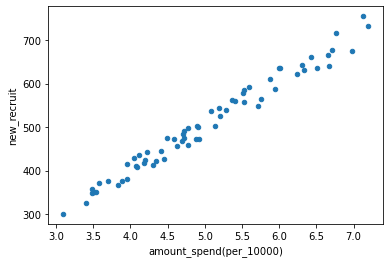

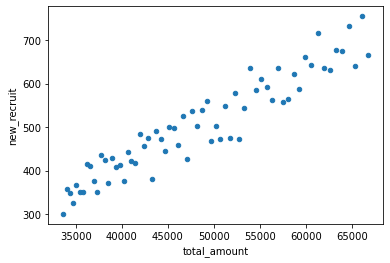

In [72]:
import random
import pandas as pd

amount_modifer = 100.9

csv_text = ''
total = 66000
manufactored_data = []
manufactored_data.append([2020,666,6.66])  
for year in range(2019, 2020-66,-1):
    modifier = amount_modifer + random.randint(-5,5)
    spend = round(total*((100+random.randint(-10,10))/100)/10000,2)
    new_recruits = int(round(spend*modifier,0))
    if(year < 2019):
        total -= new_recruits
    manufactored_data.append([year, new_recruits, spend])

manufactored_data[0].append(66666)
for idx in range(0, len(manufactored_data)-1):
    row = manufactored_data[idx]
    manufactored_data[idx+1].append(row[3]-row[1])

for row in manufactored_data:
    csv_text = str(row[0]) + ',' + str(row[1]) + ',' + str(row[2]) + ',' + str(row[3]) + '\n' + csv_text
    
csv_text = 'year,new_recruit,amount_spend(per_10000),total_amount\n' + csv_text
#print(csv_text)

data = pd.read_csv('test.csv')
data.plot.scatter(x = 2, y = 1)
data.plot.scatter(x = 3, y = 1)

data

In [76]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
xs = [['ClassA', 1, 1, 1], ['ClassB', 2, 1, 0], ['ClassC', 0, 1, 2], ['ClassA', 2, 2, 2]]
print('col1 is female, col2 is male, col3 is 1, col4 is 2, col5 is 3')
encoder.fit_transform(xs).todense()

col1 is female, col2 is male, col3 is 1, col4 is 2, col5 is 3


matrix([[1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.],
        [0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.]])